In [1]:
#Import neccessary Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#Import dataset
sellers = pd.read_excel('AnalyticsSkillsTest-FictionalDataSet1.xlsx', sheet_name = 'Sellers')

In [21]:
sellers.head()

,id,type
0,1,CSR
1,2,CSR
2,3,CSR
3,4,CSR
4,5,CSR


In [22]:
cooker = pd.read_excel('AnalyticsSkillsTest-FictionalDataSet1.xlsx', sheet_name='Cooker_Sales')

In [23]:
cooker.head()

,customer_id,customer_type,sale_date,sale_territory,seller_id
0,5550019,restaurant,2019-01-01,north,1
1,5550026,household,2019-01-01,south,37
2,5550064,restaurant,2019-01-01,north,30
3,5550078,household,2019-01-01,south,16
4,5550083,household,2019-01-01,east,24


In [24]:
fuel = pd.read_excel('AnalyticsSkillsTest-FictionalDataSet1.xlsx', sheet_name='Fuel_Sales')

In [25]:
fuel.head()

,customer_id,tx_date,litres_sold
0,5551464,2019-02-24,2.121
1,5551528,2019-03-19,2.255
2,5551310,2019-01-28,2.103
3,5551891,2019-03-21,2.154
4,5551796,2019-03-23,2.230


In [26]:
# Performing EDA
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10500 non-null  int64 
 1   type    10500 non-null  object
dtypes: int64(1), object(1)
memory usage: 164.2+ KB


In [27]:
#Checking formissing values
sellers.isnull().sum(axis=1).sum()

0

In [28]:
cooker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     2500 non-null   int64         
 1   customer_type   2500 non-null   object        
 2   sale_date       2500 non-null   datetime64[ns]
 3   sale_territory  2500 non-null   object        
 4   seller_id       2500 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 97.8+ KB


In [29]:
#Checking formissing values
cooker.isnull().sum(axis=1).sum()

0

In [30]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41372 entries, 0 to 41371
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  41372 non-null  int64         
 1   tx_date      41372 non-null  datetime64[ns]
 2   litres_sold  41372 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 969.8 KB


In [31]:
#Checking formissing values
fuel.isnull().sum(axis=1).sum()

0

In [32]:
#Checking for duplicate values
sellers.duplicated().sum()

0

In [38]:
#Checking for duplicate values
cooker.duplicated().sum()

0

In [36]:
# Checking number in each channel
sellers.groupby(['type']).size()

type
Agent        500
CSR           50
Referrer    9950
dtype: int64

In [41]:
# Merge Sellers table and Cooker Sales table to perform indepth Analysis
dataset = pd.merge(sellers, cooker, left_on='id', right_on='seller_id', how='inner')
dataset.head()

,id,type,customer_id,customer_type,sale_date,sale_territory,seller_id
0,1,CSR,5550019,restaurant,2019-01-01,north,1
1,1,CSR,5550241,restaurant,2019-01-03,west,1
2,1,CSR,5550504,household,2019-01-03,south,1
3,1,CSR,5550236,restaurant,2019-01-06,east,1
4,1,CSR,5550481,household,2019-01-06,west,1


In [49]:
# Checking number of sales in each channel
graph_1=dataset.groupby(['type']).size().reset_index().rename(columns={0:'number_of_sales'})
graph_1

,type,number_of_sales
0,Agent,605
1,CSR,925
2,Referrer,970


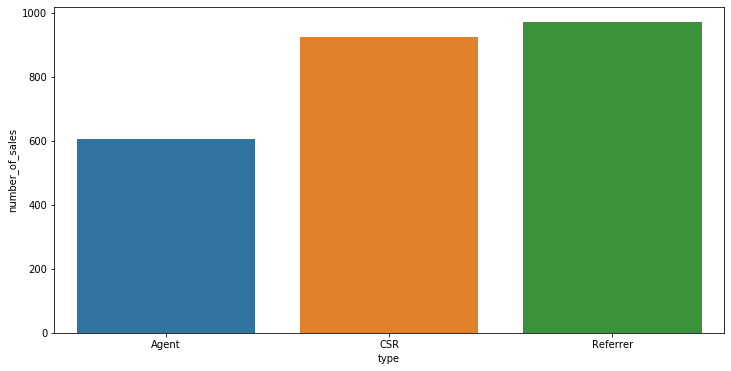

In [81]:
sns.barplot(x='type', y = 'number_of_sales', data = graph_1 )

Referrer and CSR sells more than Company hired Agents

In [51]:
graph_2=dataset.groupby(['customer_type']).size().reset_index().rename(columns={0:'number_of_sales'})
graph_2

,customer_type,number_of_sales
0,household,1245
1,restaurant,1255


([<matplotlib.patches.Wedge at 0x1c70cd8fa08>,
 [Text(0.006911472368401293, 1.0999782868537455, 'household'),
  Text(-0.006911575355801182, -1.099978286206642, 'restaurant')],
 [Text(0.003769894019127977, 0.5999881564656793, '49.80%'),
  Text(-0.0037699501940733713, -0.5999881561127138, '50.20%')])

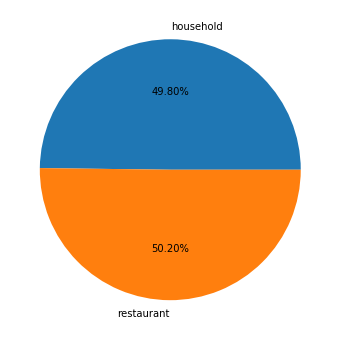

In [80]:
plt.pie(x='number_of_sales', data=graph_2, labels= 'customer_type', autopct ='%1.2f%%')

About the same number of cookers sold to both Resturants and Households, but resturants sells a little more 

In [70]:
graph_3=dataset.groupby(['sale_territory']).size().reset_index().rename(columns={0:'number_of_sales'})
graph_3

,sale_territory,number_of_sales
0,east,652
1,north,634
2,south,631
3,west,583


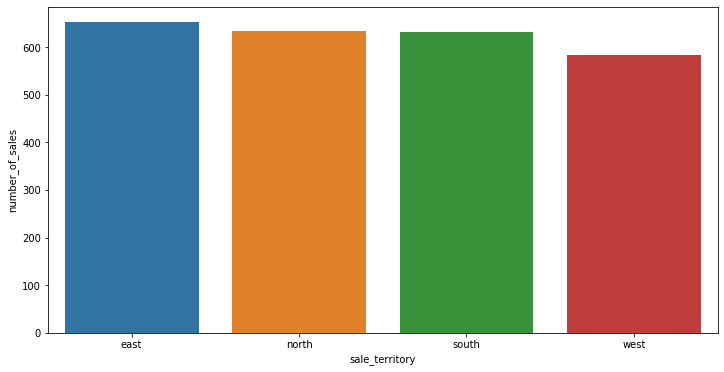

In [88]:
sns.barplot(x='sale_territory', y = 'number_of_sales', data = graph_3 )

In [95]:
graph_4=dataset.groupby(['type','sale_territory']).size().reset_index().rename(columns={0:'number_of_sales'})
graph_4

,type,sale_territory,number_of_sales
0,Agent,east,153
1,Agent,north,164
2,Agent,south,152
3,Agent,west,136
4,CSR,east,241
5,CSR,north,244
6,CSR,south,211
7,CSR,west,229
8,Referrer,east,258
9,Referrer,north,226


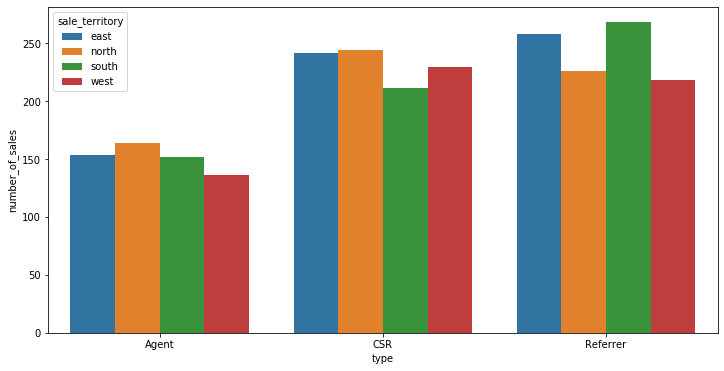

In [96]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='type', y = 'number_of_sales', hue = 'sale_territory', data = graph_4 )

# OBSERVATION
- Referrers in the East and South sell more cookers than those in the West and North
- CSR sell more cookers in the East, North and West
- Agents get more sales in the North, East and Soth 

In [89]:
#Convert Sales dates to days of week to know when sales are being made the most.
dataset['day_of_week'] = dataset['sale_date'].dt.day_name()

In [90]:
dataset.head()

,id,type,customer_id,customer_type,sale_date,sale_territory,seller_id,day_of_week
0,1,CSR,5550019,restaurant,2019-01-01,north,1,Tuesday
1,1,CSR,5550241,restaurant,2019-01-03,west,1,Thursday
2,1,CSR,5550504,household,2019-01-03,south,1,Thursday
3,1,CSR,5550236,restaurant,2019-01-06,east,1,Sunday
4,1,CSR,5550481,household,2019-01-06,west,1,Sunday


In [93]:
graph_5=dataset.groupby(['day_of_week']).size().reset_index().rename(columns={0:'number_of_sales'})
graph_5

,day_of_week,number_of_sales
0,Friday,327
1,Monday,334
2,Saturday,328
3,Sunday,301
4,Thursday,385
5,Tuesday,419
6,Wednesday,406


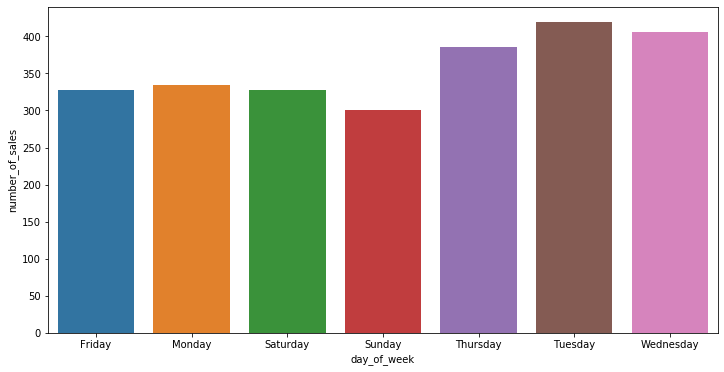

In [98]:
sns.barplot(x='day_of_week', y = 'number_of_sales', data = graph_5 )

More sales are being made on Tuesday, Wednesday and Thursday
Sundays has the least amount of sales

In [143]:
graph_6=dataset.groupby(['day_of_week','type']).size().reset_index().rename(columns={0:'number_of_sales'})
graph_6

,day_of_week,type,number_of_sales
0,Friday,Agent,89
1,Friday,CSR,95
2,Friday,Referrer,143
3,Monday,Agent,83
4,Monday,CSR,135
5,Monday,Referrer,116
6,Saturday,Agent,79
7,Saturday,CSR,120
8,Saturday,Referrer,129
9,Sunday,Agent,88


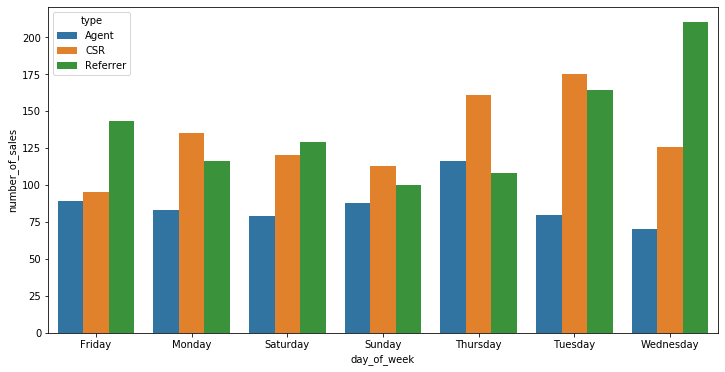

In [144]:
sns.barplot(x='day_of_week', y = 'number_of_sales', hue = 'type', data = graph_6 )

# OBSERVATION
Referrers make most of their sales on Wednesday and less on Sunday

CSR make most of their slaes on Tuesday and least on Friday

Agents make most of their sales on Thursday and least on Wednesday

# ANSWER BUSINESS QUESTIONS FROM ANALYSIS
- Referrer's channel is the most productive and most efficient; company doesn't have to pay for training of these individuals and just commissions are paid for products sold 
- Therefore more sales from this channel means more revenue from the company at only a cost of commissions being paid to these referrers


Additional datasets required 
- How many restruants and households are in that city, 
- The kind of resturants that buy BURN cookers  would be helpful, so as to determine which set of customers the BURN cooker would be suitable for
- Average price of BURN cookers to other cookers, and BURN Fuel to other fuels

In [158]:
# Merge cooker dataset to fuel data
fuel_data = pd.merge(dataset, fuel, on='customer_id', how='left')
fuel_data.head()


,id,type,customer_id,customer_type,sale_date,sale_territory,seller_id,day_of_week,tx_date,litres_sold
0,1,CSR,5550019,restaurant,2019-01-01,north,1,Tuesday,2019-01-10,1.227
1,1,CSR,5550019,restaurant,2019-01-01,north,1,Tuesday,2019-03-03,0.514
2,1,CSR,5550019,restaurant,2019-01-01,north,1,Tuesday,2019-03-10,1.173
3,1,CSR,5550019,restaurant,2019-01-01,north,1,Tuesday,2019-02-25,0.678
4,1,CSR,5550019,restaurant,2019-01-01,north,1,Tuesday,2019-02-17,0.634


In [159]:
graph_7 = fuel_data.groupby(['type','customer_type'])['litres_sold'].mean().reset_index().rename(columns={'litres_sold':'Average_litres_sold'})
graph_7

,type,customer_type,Average_litres_sold
0,Agent,household,2.150739
1,Agent,restaurant,2.151078
2,CSR,household,1.146007
3,CSR,restaurant,1.151587
4,Referrer,household,1.899068
5,Referrer,restaurant,1.900239


In [160]:
fuel_data.drop(columns=['id','sale_date','day_of_week'], axis=1, inplace= True)
fuel_data.head()

,type,customer_id,customer_type,sale_territory,seller_id,tx_date,litres_sold
0,CSR,5550019,restaurant,north,1,2019-01-10,1.227
1,CSR,5550019,restaurant,north,1,2019-03-03,0.514
2,CSR,5550019,restaurant,north,1,2019-03-10,1.173
3,CSR,5550019,restaurant,north,1,2019-02-25,0.678
4,CSR,5550019,restaurant,north,1,2019-02-17,0.634


In [161]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41419 entries, 0 to 41418
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   type            41419 non-null  object        
 1   customer_id     41419 non-null  int64         
 2   customer_type   41419 non-null  object        
 3   sale_territory  41419 non-null  object        
 4   seller_id       41419 non-null  int64         
 5   tx_date         41372 non-null  datetime64[ns]
 6   litres_sold     41372 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 2.5+ MB


In [162]:
fuel_data['month'] = fuel_data['tx_date'].dt.month_name()

In [163]:
fuel_data.head()

,type,customer_id,customer_type,sale_territory,seller_id,tx_date,litres_sold,month
0,CSR,5550019,restaurant,north,1,2019-01-10,1.227,January
1,CSR,5550019,restaurant,north,1,2019-03-03,0.514,March
2,CSR,5550019,restaurant,north,1,2019-03-10,1.173,March
3,CSR,5550019,restaurant,north,1,2019-02-25,0.678,February
4,CSR,5550019,restaurant,north,1,2019-02-17,0.634,February


In [164]:
graph = fuel_data.groupby(['month'])['litres_sold'].mean().reset_index().rename(columns={'litres_sold':'Average_litres_sold'})
graph

,month,Average_litres_sold
0,February,1.702422
1,January,1.717208
2,March,1.694240


In [165]:
#Finding the average monthly fuel consumption per cooker for each channel
graph_8 = fuel_data.groupby(['type','month'])['litres_sold'].mean().reset_index().rename(columns={'litres_sold':'Average_litres_sold'})
graph_8

,type,month,Average_litres_sold
0,Agent,February,2.150004
1,Agent,January,2.149680
2,Agent,March,2.152419
3,CSR,February,1.158843
4,CSR,January,1.132253
5,CSR,March,1.147123
6,Referrer,February,1.900941
7,Referrer,January,1.901969
8,Referrer,March,1.897388


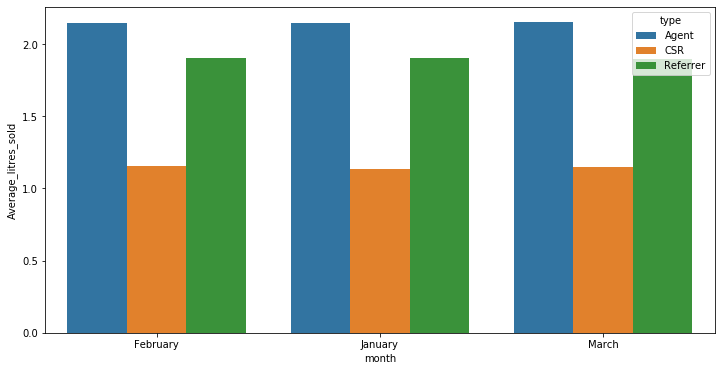

In [166]:
sns.barplot(x='month', y = 'Average_litres_sold', hue = 'type', data = graph_8 )

Cookers sold through the Agent channels purchases more fuel per month than cookers sold through CSR channels

In [167]:
# Trying togain more insight on the above situation
insight=dataset.groupby(['type','customer_type']).size().reset_index().rename(columns={0:'number_of_sales'})
insight

,type,customer_type,number_of_sales
0,Agent,household,299
1,Agent,restaurant,306
2,CSR,household,459
3,CSR,restaurant,466
4,Referrer,household,487
5,Referrer,restaurant,483


# Observation
- Agents sell BURN cookers and gas to consumers who are more likely to consume more BURN fuel, for example, selling to more industrial resturants who cook more often than an avergae resturants and housholds with more individuals in them
- CSR channel sells more cookers but fuel consumption is low probably due to the fact that they sell to resturants and individuals who do not cook that often
- Referrers sells to both household and restutants who buy more cookers and also buy fuel required for them (A balanced structure)

## TASK 2

In [351]:
# Importing the datasets
metrics = pd.read_excel('AnalyticsSkillsTest-FictionalDataSet2.xlsx', sheet_name = 'Customer Metrics')

In [148]:
metrics.head()

,date,user_id,cookers,canisters,monthly_average_litres_per_user,total_fuel_dispensed_ml,monthly_active
0,2022-10-31,1000006,2,2,10.627901,55093.197034,Active
1,2022-10-31,1000015,1,1,0.000000,22098.394863,Inactive
2,2022-10-31,1000018,1,1,0.000000,19563.876367,Inactive
3,2022-10-31,1000038,1,1,0.000000,15440.789984,Inactive
4,2022-10-31,1000074,1,1,2.201975,24376.765212,Active


In [149]:
user = pd.read_excel('AnalyticsSkillsTest-FictionalDataSet2.xlsx', sheet_name = 'User')
user.head()

,user_id,customer_type,fulfilment_date,neighbourhood_id
0,2869,Household,2022-05-19,N10273399
1,6046,Household,2021-03-11,N10272768
2,7937,Household,2021-05-04,N10273020
3,9460,Household,2022-07-07,N10272826
4,9652,Household,2021-01-05,N10272792


In [150]:
neighbor = pd.read_excel('AnalyticsSkillsTest-FictionalDataSet2.xlsx', sheet_name = 'Neighborhoods')
neighbor.head()

,neighbourhood_id,neighbourhood,network,region,burn_points
0,N10272727,Thika,NAIROBI,capital,94
1,N10272729,Kisauni,MOMBASA,capital,49
2,N10272738,Kayole,NAIROBI,capital,136
3,N10272768,Githurai 45,NAIROBI,capital,69
4,N10272779,Majengo MBA,MOMBASA,capital,27


In [151]:
#Checking necessary information about dataset
metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171234 entries, 0 to 171233
Data columns (total 7 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date                             171234 non-null  datetime64[ns]
 1   user_id                          171234 non-null  int64         
 2   cookers                          171234 non-null  int64         
 3   canisters                        171234 non-null  int64         
 4   monthly_average_litres_per_user  171234 non-null  float64       
 5   total_fuel_dispensed_ml          171234 non-null  float64       
 6   monthly_active                   171234 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 9.1+ MB


In [152]:
metrics.isnull().sum(axis=1).sum()

0

In [153]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39589 entries, 0 to 39588
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           39589 non-null  int64         
 1   customer_type     39589 non-null  object        
 2   fulfilment_date   39589 non-null  datetime64[ns]
 3   neighbourhood_id  39589 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


In [154]:
user.isnull().sum(axis=1).sum()

0

In [155]:
neighbor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   neighbourhood_id  100 non-null    object
 1   neighbourhood     100 non-null    object
 2   network           100 non-null    object
 3   region            100 non-null    object
 4   burn_points       100 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [156]:
neighbor.isnull().sum(axis=1).sum()

0

In [157]:
# Merging all dataset 
final_data = pd.merge(metrics, user, on='user_id', how='left')
final_data.head()

,date,user_id,cookers,canisters,monthly_average_litres_per_user,total_fuel_dispensed_ml,monthly_active,customer_type,fulfilment_date,neighbourhood_id
0,2022-10-31,1000006,2,2,10.627901,55093.197034,Active,Household,2021-06-29,N10273049
1,2022-10-31,1000015,1,1,0.000000,22098.394863,Inactive,Household,2021-06-30,N10273020
2,2022-10-31,1000018,1,1,0.000000,19563.876367,Inactive,Household,2021-07-10,N10273182
3,2022-10-31,1000038,1,1,0.000000,15440.789984,Inactive,Household,2021-06-29,N10272738
4,2022-10-31,1000074,1,1,2.201975,24376.765212,Active,Household,2021-07-06,N10273182


In [168]:
final_data.isnull().sum(axis=1).sum()

0

In [169]:
final_dataset = pd.merge(final_data, neighbor, on='neighbourhood_id', how='left')
final_dataset.head()

,date,user_id,cookers,canisters,monthly_average_litres_per_user,total_fuel_dispensed_ml,monthly_active,customer_type,fulfilment_date,neighbourhood_id,neighbourhood,network,region,burn_points
0,2022-10-31,1000006,2,2,10.627901,55093.197034,Active,Household,2021-06-29,N10273049,Pipeline,NAIROBI,capital,48
1,2022-10-31,1000015,1,1,0.000000,22098.394863,Inactive,Household,2021-06-30,N10273020,Kahawa West,NAIROBI,capital,49
2,2022-10-31,1000018,1,1,0.000000,19563.876367,Inactive,Household,2021-07-10,N10273182,Athi River,NAIROBI,capital,49
3,2022-10-31,1000038,1,1,0.000000,15440.789984,Inactive,Household,2021-06-29,N10272738,Kayole,NAIROBI,capital,136
4,2022-10-31,1000074,1,1,2.201975,24376.765212,Active,Household,2021-07-06,N10273182,Athi River,NAIROBI,capital,49


In [170]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171234 entries, 0 to 171233
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date                             171234 non-null  datetime64[ns]
 1   user_id                          171234 non-null  int64         
 2   cookers                          171234 non-null  int64         
 3   canisters                        171234 non-null  int64         
 4   monthly_average_litres_per_user  171234 non-null  float64       
 5   total_fuel_dispensed_ml          171234 non-null  float64       
 6   monthly_active                   171234 non-null  object        
 7   customer_type                    171234 non-null  object        
 8   fulfilment_date                  171234 non-null  datetime64[ns]
 9   neighbourhood_id                 171234 non-null  object        
 10  neighbourhood                    171234 non-

In [174]:
# Extracting the Month name from the date column
final_dataset['month'] = final_dataset['date'].dt.month_name()
final_dataset.head(10)

,date,user_id,cookers,canisters,monthly_average_litres_per_user,total_fuel_dispensed_ml,monthly_active,customer_type,fulfilment_date,neighbourhood_id,neighbourhood,network,region,burn_points,month
0,2022-10-31,1000006,2,2,10.627901,55093.197034,Active,Household,2021-06-29,N10273049,Pipeline,NAIROBI,capital,48,October
1,2022-10-31,1000015,1,1,0.000000,22098.394863,Inactive,Household,2021-06-30,N10273020,Kahawa West,NAIROBI,capital,49,October
2,2022-10-31,1000018,1,1,0.000000,19563.876367,Inactive,Household,2021-07-10,N10273182,Athi River,NAIROBI,capital,49,October
3,2022-10-31,1000038,1,1,0.000000,15440.789984,Inactive,Household,2021-06-29,N10272738,Kayole,NAIROBI,capital,136,October
4,2022-10-31,1000074,1,1,2.201975,24376.765212,Active,Household,2021-07-06,N10273182,Athi River,NAIROBI,capital,49,October
5,2022-10-31,1000112,1,1,5.482469,32146.592303,Active,Household,2021-06-30,N10273141,Kawangware,NAIROBI,capital,42,October
6,2022-10-31,1000129,1,1,0.000000,17491.098608,Inactive,Household,2021-06-29,N10272825,Githurai 44,NAIROBI,capital,55,October
7,2022-10-31,1000130,1,1,8.425926,42095.925547,Active,Household,2021-06-30,N10272768,Githurai 45,NAIROBI,capital,69,October
8,2022-10-31,1000151,1,1,20.851358,81855.060991,Active,Household,2021-06-29,N10272799,Umoja Innercore and 1,NAIROBI,capital,49,October
9,2022-10-31,1000156,1,1,8.425926,33318.357724,Active,Household,2021-08-04,N10272792,Juja,NAIROBI,capital,74,October


In [281]:
# Grouping the number of users by month
read = final_dataset.groupby(['month','monthly_active']).size().reset_index().rename(columns={0:'Number_of_users'})
read.head()

,month,monthly_active,Number_of_users
0,August,Active,19753
1,August,Inactive,7011
2,August,New user,360
3,December,Active,17091
4,December,Inactive,9597


In [301]:
# Finding the Active user ratio per month

#Step 1: Create a new DataFrame with the number of active and inactive users for each neighborhood
research = read.pivot(index='month', columns='monthly_active', values='Number_of_users').reset_index()
research.columns = ['month', 'active_users', 'inactive_users', 'new_user']
research.head()

#Step 2: Calculate the ratio of active to inactive users for each neighborhood
research['active_ratio'] = research['active_users'] / (research['inactive_users'] + research['active_users']) 

#Step 3: Group the DataFrame by neighborhood and calculate the mean of the ratio column
Monthly_active_ratio = research.groupby('month')['active_ratio'].mean().reset_index()

Monthly_active_ratio
#ratio_by_neighborhood
#insight = final_dataset.groupby

,month,active_ratio
0,August,0.738044
1,December,0.640400
2,July,0.775842
3,November,0.638704
4,October,0.660377
5,September,0.684792


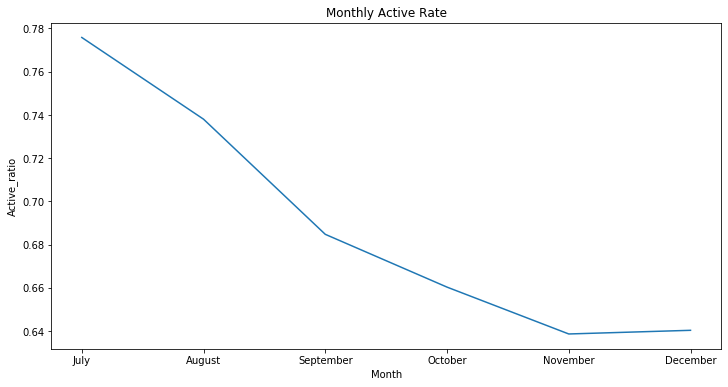

In [302]:
# Converting the month column to categorical data type with the desired order of categories
Monthly_active_ratio['month'] = pd.Categorical(Monthly_active_ratio['month'], categories=['July', 'August', 'September', 'October','November','December'], ordered=True)

# Sorting the dataframe by the month column
Monthly_active_ratio = Monthly_active_ratio.sort_values('month')

# showing the line graph
sns.lineplot(x='month', y='active_ratio', data= Monthly_active_ratio)
plt.title("Monthly Active Rate")
plt.xlabel("Month")
plt.ylabel("Active_ratio")
plt.show()

# OBSERVATION
Actvie ratio reduces as the month goes by

In [296]:
#Finding the average monthly sales for Active members
active_data = final_dataset[final_dataset['monthly_active'] == 'Active']
graph_10 = active_data.groupby(['month'])['monthly_average_litres_per_user'].mean().reset_index()
graph_10

,month,monthly_average_litres_per_user
0,August,7.949377
1,December,8.601718
2,July,8.164853
3,November,8.276257
4,October,8.160847
5,September,8.099192


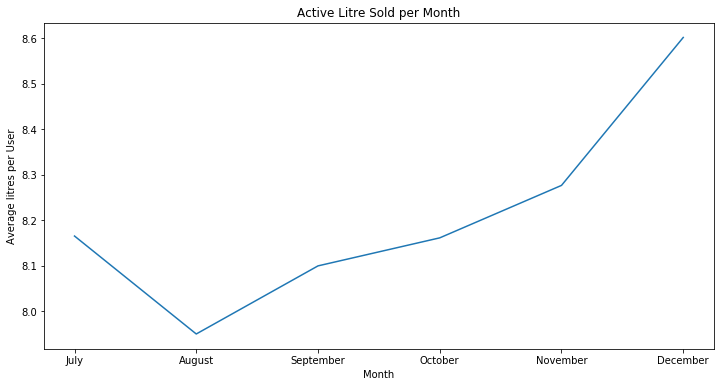

In [352]:
# Converting the month column to categorical data type with the desired order of categories
graph_10['month'] = pd.Categorical(graph_10['month'], categories=['July', 'August', 'September', 'October','November','December'], ordered=True)

# Sorting the dataframe by the month column
graph_10 = graph_10.sort_values('month')

# showing the line graph
sns.lineplot(x='month', y='monthly_average_litres_per_user', data=graph_10)
plt.title("Active Litre Sold per Month")
plt.xlabel("Month")
plt.ylabel("Average litres per User")
plt.show()

# OBSERVATION

- More litres are being filled into cannisters in December, which shows an average of about 8.6 litres, most likely due to the festive season
- From September to Decemeber we can see an increasing average litres being sold into cannisters

In [189]:
active_data.head()

,date,user_id,cookers,canisters,monthly_average_litres_per_user,total_fuel_dispensed_ml,monthly_active,customer_type,fulfilment_date,neighbourhood_id,neighbourhood,network,region,burn_points,month
0,2022-10-31,1000006,2,2,10.627901,55093.197034,Active,Household,2021-06-29,N10273049,Pipeline,NAIROBI,capital,48,October
4,2022-10-31,1000074,1,1,2.201975,24376.765212,Active,Household,2021-07-06,N10273182,Athi River,NAIROBI,capital,49,October
5,2022-10-31,1000112,1,1,5.482469,32146.592303,Active,Household,2021-06-30,N10273141,Kawangware,NAIROBI,capital,42,October
7,2022-10-31,1000130,1,1,8.425926,42095.925547,Active,Household,2021-06-30,N10272768,Githurai 45,NAIROBI,capital,69,October
8,2022-10-31,1000151,1,1,20.851358,81855.060991,Active,Household,2021-06-29,N10272799,Umoja Innercore and 1,NAIROBI,capital,49,October


In [263]:
# Finding the number of Active users in each Neigbourhood
graph_11 = active_data.groupby(['monthly_active','neighbourhood']).size().reset_index().rename(columns={0:'Number_of_users'})
graph_11

,monthly_active,neighbourhood,Number_of_users
0,Active,AFRAHA,45
1,Active,Athi River,815
2,Active,BAMBURI,486
3,Active,BANDARI,79
4,Active,BOFU,178
...,...,...,...
95,Active,WATHOREGO,10
96,Active,WORKERS,2
97,Active,Waithaka,1957
98,Active,Waruku,91


In [264]:
# Top 20 neighbourhoods with active members
top_20_neighbourhoods = final_dataset['neighbourhood'].value_counts().nlargest(20).reset_index()
top_20_neighbourhoods.columns = ['neighbourhood', 'Number_of_users']
top_20_neighbourhoods.head(20)


,neighbourhood,Number_of_users
0,Kisauni,25285
1,Majengo MBA,15727
2,MAGOGONI,11190
3,Thika,7235
4,Kongowea,6966
5,Githurai 45,5944
6,MTWAPA,5887
7,Kayole,5363
8,MANYATTA A,5295
9,MANYATTA B,5220


Text(0.5, 1.0, 'Top 20 cities with Active customers')

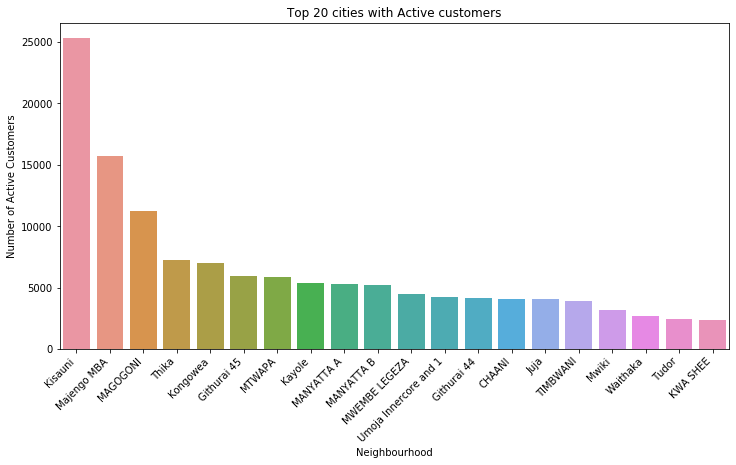

In [265]:
# Graph showing top 20 neighbourhoods with active users
graph_12 = sns.barplot(x='neighbourhood', y='Number_of_users', data=top_20_neighbourhoods)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Active Customers')
plt.title('Top 20 cities with Active customers')

# Observation
- Kisauni has the highest number of active users with a total number of 25,285 active users, followed by Majengo MBA(15,727) and Magogoni (11190)

In [354]:
# lowest 20 neighbourhoods with active members
lowest_20_neighbourhoods = final_dataset['neighbourhood'].value_counts().nsmallest(20).reset_index()
lowest_20_neighbourhoods.columns = ['neighbourhood', 'Number_of_users']
lowest_20_neighbourhoods.head(20)


,neighbourhood,Number_of_users
0,KORANDO 'B',1
1,KIVUMBINI,2
2,OKOK,2
3,MENENGAI FREE-AREA,2
4,SUNGA,2
5,WORKERS,2
6,MUGUGA,2
7,USENGE,3
8,KORANDO 'A',3
9,KOWINO,4


Text(0.5, 1.0, 'Least 20 Neighbourhood with Active customers')

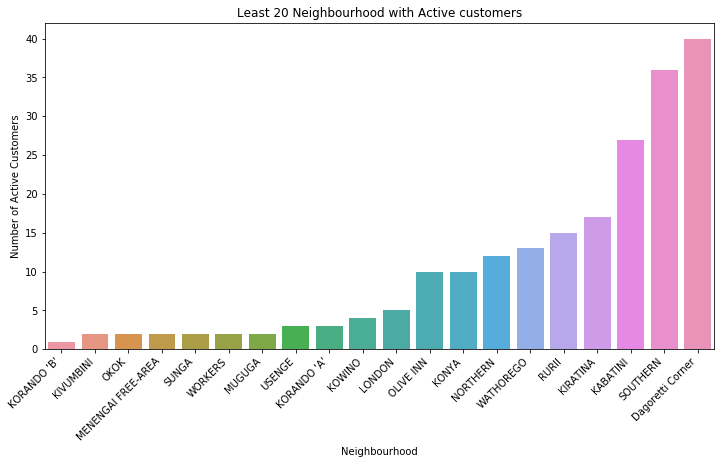

In [355]:
# Graph showing 20 nighbourhood with least customers
graph_13 = sns.barplot(x='neighbourhood', y='Number_of_users', data=lowest_20_neighbourhoods)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Active Customers')
plt.title('Least 20 Neighbourhood with Active customers')

KORANDO 'B' has the lowest number of active users with a total number of 1 active user, followed by KIVUMBINI, OKOK, SUNGA(2)

# BUSINESS QUESTION 3

#### Retention Ratio in each Neighbourhood?

In [234]:
final_dataset.head()

,date,user_id,cookers,canisters,monthly_average_litres_per_user,total_fuel_dispensed_ml,monthly_active,customer_type,fulfilment_date,neighbourhood_id,neighbourhood,network,region,burn_points,month
0,2022-10-31,1000006,2,2,10.627901,55093.197034,Active,Household,2021-06-29,N10273049,Pipeline,NAIROBI,capital,48,October
1,2022-10-31,1000015,1,1,0.000000,22098.394863,Inactive,Household,2021-06-30,N10273020,Kahawa West,NAIROBI,capital,49,October
2,2022-10-31,1000018,1,1,0.000000,19563.876367,Inactive,Household,2021-07-10,N10273182,Athi River,NAIROBI,capital,49,October
3,2022-10-31,1000038,1,1,0.000000,15440.789984,Inactive,Household,2021-06-29,N10272738,Kayole,NAIROBI,capital,136,October
4,2022-10-31,1000074,1,1,2.201975,24376.765212,Active,Household,2021-07-06,N10273182,Athi River,NAIROBI,capital,49,October


In [237]:
testing = final_dataset.groupby(['monthly_active','neighbourhood']).size().reset_index().rename(columns={0:'Number_of_users'})
testing

,monthly_active,neighbourhood,Number_of_users
0,Active,AFRAHA,45
1,Active,Athi River,815
2,Active,BAMBURI,486
3,Active,BANDARI,79
4,Active,BOFU,178
...,...,...,...
273,New user,VIJIWENI,8
274,New user,WATHOREGO,2
275,New user,Waithaka,64
276,New user,Waruku,1


In [308]:
#Creating a new DataFrame with the number of active and inactive users for each neighborhood
user_counts = testing.pivot(index='neighbourhood', columns='monthly_active', values='Number_of_users').reset_index()
user_counts.head()
user_counts.columns = ['neighbourhood', 'active_users', 'inactive_users', 'new_user']
user_counts = user_counts.fillna(0)
user_counts.head()

#Calculating the ratio of active to inactive users for each neighborhood
user_counts['active_inactive_ratio'] = user_counts['active_users'] / (user_counts['inactive_users'] + user_counts['active_users']) 

#Grouping the DataFrame by neighborhood and calculate the mean of the ratio column
ratio_by_neighborhood = user_counts.groupby('neighbourhood')['active_inactive_ratio'].mean().reset_index()


ratio_by_neighborhood

,neighbourhood,active_inactive_ratio
0,AFRAHA,0.849057
1,Athi River,0.687764
2,BAMBURI,0.670345
3,BANDARI,0.731481
4,BOFU,0.674242
...,...,...
95,WATHOREGO,0.909091
96,WORKERS,1.000000
97,Waithaka,0.751825
98,Waruku,0.535294


# BUSINESS QUESTION 4

#### Is Retentation ratio affected by the number of Burn Points in each Neighbourhood?

Text(0.5, 1.0, 'Neighbourhoods by retention ratio')

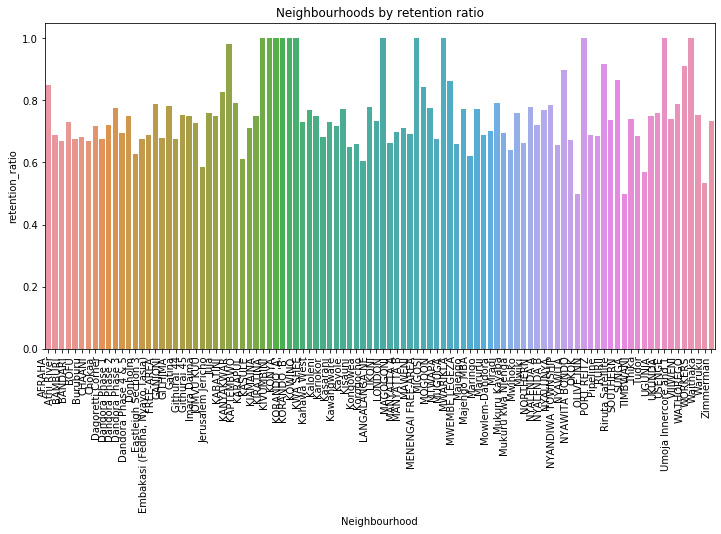

In [319]:
retention_graph = sns.barplot(x='neighbourhood', y='active_inactive_ratio', data=ratio_by_neighborhood)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Neighbourhood')
plt.ylabel('retention_ratio')
plt.title('Neighbourhoods by retention ratio')

In [333]:
#Neighbourhoods with top 20 highest retentions
highest_ratio_20_neighbourhoods = ratio_by_neighborhood['active_inactive_ratio'].value_counts().nlargest(20).reset_index()
highest_ratio_20_neighbourhoods.columns = ['active_inactive_ratio', 'neighbourhood']
highest_ratio_20_neighbourhoods.head(20)

,active_inactive_ratio,neighbourhood
0,1.000000,12
1,0.777778,2
2,0.787879,2
3,0.500000,2
4,0.750000,2
5,0.638833,1
6,0.695652,1
7,0.792453,1
8,0.700541,1
9,0.687023,1


In [356]:
burn_point = final_dataset.groupby(['neighbourhood','burn_points']).size().reset_index().rename(columns={0:'Number_of_users'})
burn_point
retention_per_burn_point = pd.merge(burn_point, ratio_by_neighborhood, on='neighbourhood', how='inner')
retention_per_burn_point.head(10)

,neighbourhood,burn_points,Number_of_users,active_inactive_ratio
0,AFRAHA,30,59,0.849057
1,Athi River,49,1229,0.687764
2,BAMBURI,24,732,0.670345
3,BANDARI,31,108,0.731481
4,BOFU,31,273,0.674242
5,Buruburu,28,698,0.681159
6,CHAANI,37,4087,0.669301
7,Chokaa,41,548,0.716946
8,Dagoretti Corner,21,40,0.675000
9,Dandora Phase 1,36,1218,0.720698


In [363]:
#retention_per_burn_point.to_csv("/Users/Victor Onyeaghala/Desktop/retention_rate.csv", index=False)

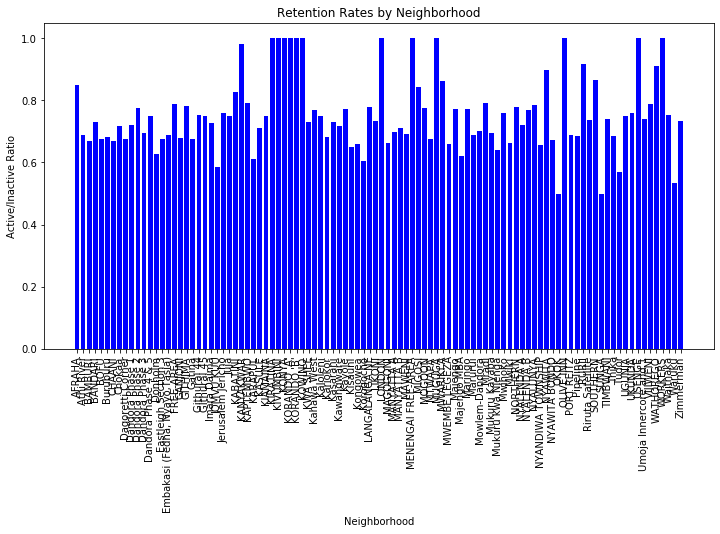

In [349]:
# create the bar graph
plt.bar(retention_per_burn_point['neighbourhood'], retention_per_burn_point['active_inactive_ratio'], color='blue')



# set the labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Active/Inactive Ratio')
plt.title('Retention Rates by Neighborhood')
plt.xticks(rotation=90)

# show the plot
plt.show()

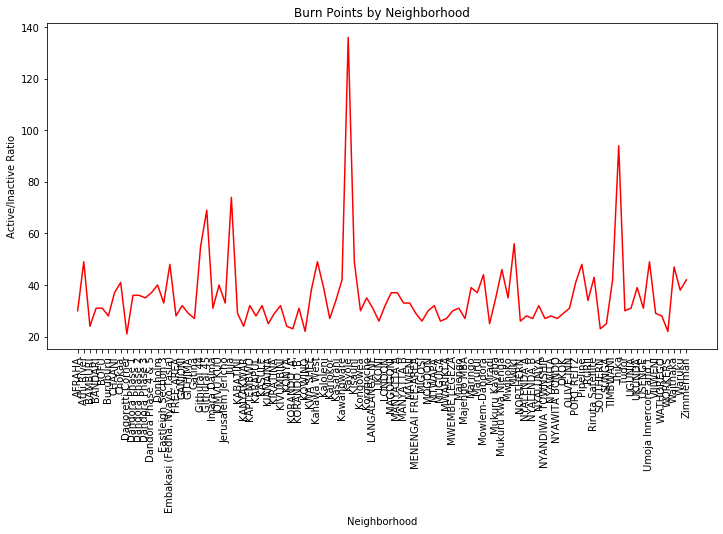

In [357]:
# plot the line graph
plt.plot(retention_per_burn_point['neighbourhood'], retention_per_burn_point['burn_points'], color='red')
# set the labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Active/Inactive Ratio')
plt.title('Burn Points by Neighborhood')
plt.xticks(rotation=90)

# show the plot
plt.show()

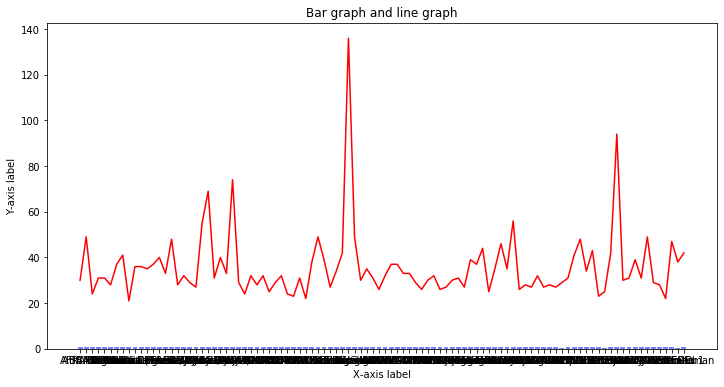

In [360]:
# plot the bar graph
plt.bar(x = 'neighbourhood', height= 'active_inactive_ratio', color='blue', alpha=0.5, data =retention_per_burn_point)

# plot the line graph
plt.plot(retention_per_burn_point['neighbourhood'], retention_per_burn_point['burn_points'], color='red')

# set the labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Bar graph and line graph')

# show the plot
plt.show()



In [361]:
final_dataset.head()

,date,user_id,cookers,canisters,monthly_average_litres_per_user,total_fuel_dispensed_ml,monthly_active,customer_type,fulfilment_date,neighbourhood_id,neighbourhood,network,region,burn_points,month
0,2022-10-31,1000006,2,2,10.627901,55093.197034,Active,Household,2021-06-29,N10273049,Pipeline,NAIROBI,capital,48,October
1,2022-10-31,1000015,1,1,0.000000,22098.394863,Inactive,Household,2021-06-30,N10273020,Kahawa West,NAIROBI,capital,49,October
2,2022-10-31,1000018,1,1,0.000000,19563.876367,Inactive,Household,2021-07-10,N10273182,Athi River,NAIROBI,capital,49,October
3,2022-10-31,1000038,1,1,0.000000,15440.789984,Inactive,Household,2021-06-29,N10272738,Kayole,NAIROBI,capital,136,October
4,2022-10-31,1000074,1,1,2.201975,24376.765212,Active,Household,2021-07-06,N10273182,Athi River,NAIROBI,capital,49,October


In [362]:
#final_dataset.to_csv("/Users/Victor Onyeaghala/Desktop/Upwork_Task2.csv", index=False)